In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime

In [2]:
clinico = pd.read_csv('ICL_NREVSS_Clinical_Labs.csv', skiprows=1)
publico = pd.read_csv('ICL_NREVSS_Public_Health_Labs.csv', skiprows=1)
ili = pd.read_csv('ILINet.csv', skiprows=1)

# Limpeza dados 
## 1- Clinico

In [3]:
clinico.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
233,National,X,2025,12,97442,6505,3950,10.72950,6.67577,4.05369
234,National,X,2025,13,90052,4458,3891,9.27131,4.95047,4.32084
235,National,X,2025,14,82103,2845,3415,7.62457,3.46516,4.15941
236,National,X,2025,15,74104,1771,2951,6.37213,2.38988,3.98224
237,National,X,2025,16,63566,1173,2358,5.55486,1.84533,3.70953


In [4]:
clinico = clinico.drop(columns=['REGION', 'REGION TYPE'])

In [5]:
clinico['TOTAL POSITIVE'] = clinico['TOTAL A'] + clinico['TOTAL B']

In [6]:
clinico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              238 non-null    int64  
 1   WEEK              238 non-null    int64  
 2   TOTAL SPECIMENS   238 non-null    int64  
 3   TOTAL A           238 non-null    int64  
 4   TOTAL B           238 non-null    int64  
 5   PERCENT POSITIVE  238 non-null    float64
 6   PERCENT A         238 non-null    float64
 7   PERCENT B         238 non-null    float64
 8   TOTAL POSITIVE    238 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 16.9 KB


# Limpeza dados 
## 2- Publico

In [7]:
publico.tail()

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v,A (H5)
233,National,X,2025,12,4324,1476,1046,262,144,143,0,0,0
234,National,X,2025,13,2685,765,477,152,133,123,0,0,0
235,National,X,2025,14,2360,688,440,104,157,127,0,0,0
236,National,X,2025,15,1632,356,183,50,121,153,0,0,0
237,National,X,2025,16,770,128,59,23,63,64,0,0,0


In [8]:
publico = publico.drop(columns=['REGION', 'REGION TYPE'])

In [9]:
publico['TOTAL A'] = publico['A (2009 H1N1)'] + publico['A (H3)'] + publico['A (Subtyping not Performed)'] + publico['A (H5)']

In [10]:
publico['TOTAL B'] = publico['B'] + publico['BVic'] + publico['BYam'] + publico['H3N2v']

In [11]:
publico['TOTAL POSITIVE'] = publico['TOTAL A'] + publico['TOTAL B']

In [12]:
publico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   YEAR                         238 non-null    int64
 1   WEEK                         238 non-null    int64
 2   TOTAL SPECIMENS              238 non-null    int64
 3   A (2009 H1N1)                238 non-null    int64
 4   A (H3)                       238 non-null    int64
 5   A (Subtyping not Performed)  238 non-null    int64
 6   B                            238 non-null    int64
 7   BVic                         238 non-null    int64
 8   BYam                         238 non-null    int64
 9   H3N2v                        238 non-null    int64
 10  A (H5)                       238 non-null    int64
 11  TOTAL A                      238 non-null    int64
 12  TOTAL B                      238 non-null    int64
 13  TOTAL POSITIVE               238 non-null    int64

In [13]:
publico = publico.drop(columns=['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v', 'A (H5)'])

In [14]:
publico.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE
233,2025,12,4324,2784,287,3071
234,2025,13,2685,1394,256,1650
235,2025,14,2360,1232,284,1516
236,2025,15,1632,589,274,863
237,2025,16,770,210,127,337


# Unindo as tabelas e normalizando
## Clinico e publico

In [15]:
dados_somados = pd.concat([clinico, publico], ignore_index=True)
colunas_somar = ['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']
gripe = dados_somados.groupby(['YEAR', 'WEEK'])[colunas_somar].sum().reset_index()

In [16]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE
233,2025,12,101766,9289,4237,13526
234,2025,13,92737,5852,4147,9999
235,2025,14,84463,4077,3699,7776
236,2025,15,75736,2360,3225,5585
237,2025,16,64336,1383,2485,3868


In [17]:
gripe.duplicated().sum()

0

In [18]:
gripe['PERCENT POSITIVE'] = (gripe['TOTAL POSITIVE'] / gripe['TOTAL SPECIMENS']) * 100
gripe['PERCENT A'] = (gripe['TOTAL A'] / gripe['TOTAL SPECIMENS']) * 100
gripe['PERCENT B'] = (gripe['TOTAL B'] / gripe['TOTAL SPECIMENS']) * 100

In [19]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B
233,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473
234,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786
235,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432
236,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213
237,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534


In [20]:
def get_date(year, week):
    return datetime.date.fromisocalendar(year, week, 1) 

In [21]:
gripe['DATE'] = [get_date(y, w) for y, w in zip(gripe['YEAR'], gripe['WEEK'])]

In [22]:
gripe['DATE'] = pd.to_datetime(gripe['DATE'])

In [23]:
gripe.duplicated(subset=['DATE']).sum()

0

In [24]:
gripe['MONTH'] = gripe['DATE'].dt.month

In [25]:
gripe['SEASON'] = pd.cut(
    gripe['MONTH'], 
    bins=[0, 3, 6, 9, 12], 
    labels=['Inverno', 'Primavera', 'Verao', 'Outono'],
    include_lowest=True
)

In [26]:
gripe.tail()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,DATE,MONTH,SEASON
233,2025,12,101766,9289,4237,13526,13.291276,9.127803,4.163473,2025-03-17,3,Inverno
234,2025,13,92737,5852,4147,9999,10.782104,6.310318,4.471786,2025-03-24,3,Inverno
235,2025,14,84463,4077,3699,7776,9.206398,4.826966,4.379432,2025-03-31,3,Inverno
236,2025,15,75736,2360,3225,5585,7.374300,3.116087,4.258213,2025-04-07,4,Primavera
237,2025,16,64336,1383,2485,3868,6.012186,2.149652,3.862534,2025-04-14,4,Primavera


In [27]:
gripe.drop(columns=['MONTH'], inplace=True)

# Análise exploratória

In [28]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   DATE              238 non-null    datetime64[ns]
 10  SEASON            238 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(6)
memory usage: 19.2 KB


In [29]:
gripe.describe().T

,count,mean,min,25%,50%,75%,max,std
YEAR,238.0,2022.521008,2020.0,2021.0,2023.0,2024.0,2025.0,1.373951
WEEK,238.0,26.466387,1.0,12.25,26.0,41.0,53.0,15.671096
TOTAL SPECIMENS,238.0,82257.613445,23825.0,51249.5,75920.5,100711.75,217213.0,40326.88172
TOTAL A,238.0,5606.647059,4.0,251.0,695.5,5410.0,61677.0,11163.937912
TOTAL B,238.0,772.096639,10.0,39.0,91.5,352.5,8731.0,1679.050197
TOTAL POSITIVE,238.0,6378.743697,17.0,345.75,929.5,6132.75,64491.0,11850.030563
PERCENT POSITIVE,238.0,4.996564,0.04484,0.452251,1.416024,6.459648,34.558431,7.308105
PERCENT A,238.0,4.258455,0.013317,0.405505,1.106271,5.35736,33.296264,6.718006
PERCENT B,238.0,0.738109,0.017278,0.053666,0.116696,0.52544,7.14894,1.449113
DATE,238,2023-01-05 12:00:00,2020-09-28 00:00:00,2021-11-16 18:00:00,2023-01-05 12:00:00,2024-02-24 06:00:00,2025-04-14 00:00:00,NaN


<Axes: >

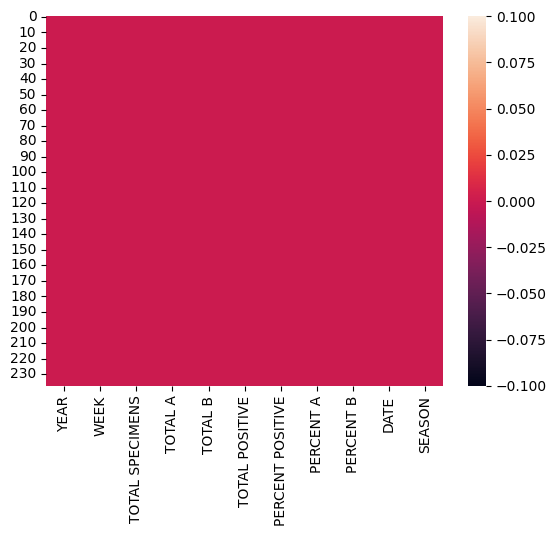

In [30]:
sns.heatmap(gripe.isnull())

In [31]:
gripe.corr(numeric_only=True)

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B
YEAR,1.000000,-0.278239,0.290609,0.334697,0.489210,0.384636,0.476726,0.407550,0.514827
WEEK,-0.278239,1.000000,-0.047505,-0.044378,-0.293504,-0.083395,-0.142943,-0.089630,-0.305365
TOTAL SPECIMENS,0.290609,-0.047505,1.000000,0.768586,0.380605,0.778015,0.773044,0.779806,0.283448
TOTAL A,0.334697,-0.044378,0.768586,1.000000,0.345976,0.991124,0.947910,0.979688,0.238679
TOTAL B,0.489210,-0.293504,0.380605,0.345976,1.000000,0.467636,0.577296,0.418025,0.973456
TOTAL POSITIVE,0.384636,-0.083395,0.778015,0.991124,0.467636,1.000000,0.974826,0.982197,0.362790
PERCENT POSITIVE,0.476726,-0.142943,0.773044,0.947910,0.577296,0.974826,1.000000,0.982160,0.489918
PERCENT A,0.407550,-0.089630,0.779806,0.979688,0.418025,0.982197,0.982160,1.000000,0.317246
PERCENT B,0.514827,-0.305365,0.283448,0.238679,0.973456,0.362790,0.489918,0.317246,1.000000


<Axes: >

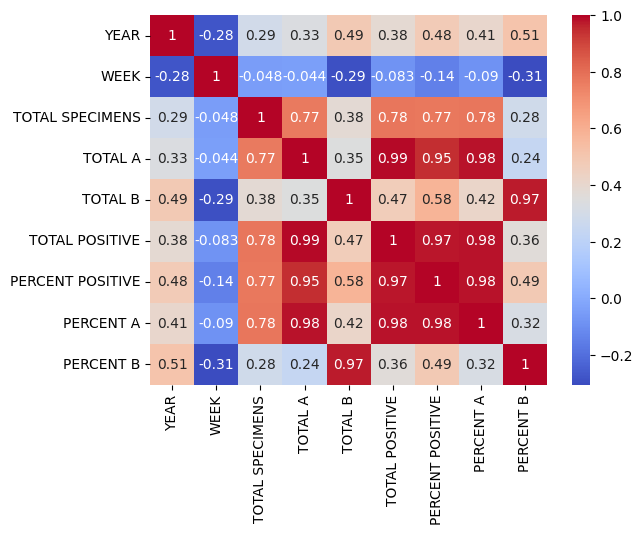

In [32]:
sns.heatmap(gripe.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

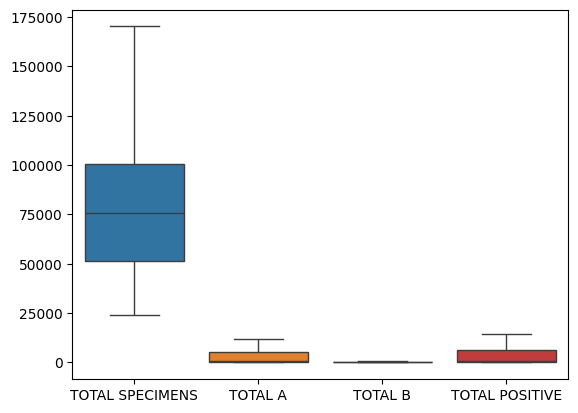

In [33]:
sns.boxplot(data=gripe[['TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B', 'TOTAL POSITIVE']], showfliers=False)

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

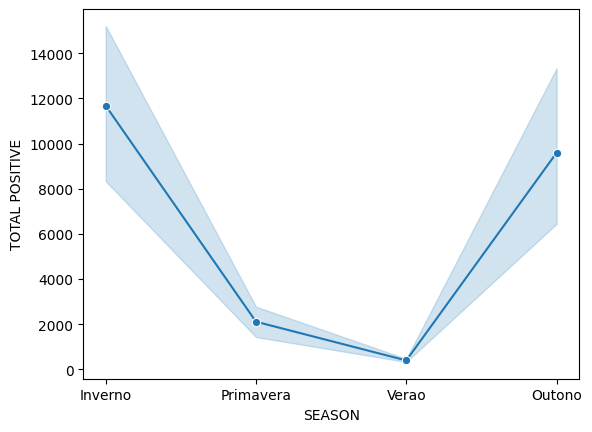

In [34]:
sns.lineplot(data=gripe, x='SEASON', y='TOTAL POSITIVE', marker='o')

<Axes: xlabel='YEAR', ylabel='TOTAL POSITIVE'>

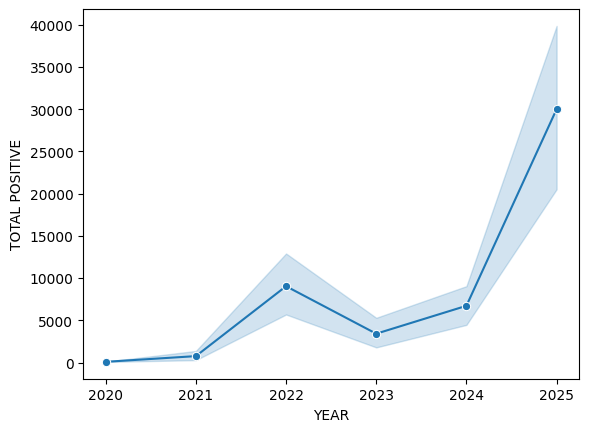

In [35]:
sns.lineplot(data=gripe, x='YEAR', y='TOTAL POSITIVE', marker='o')

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

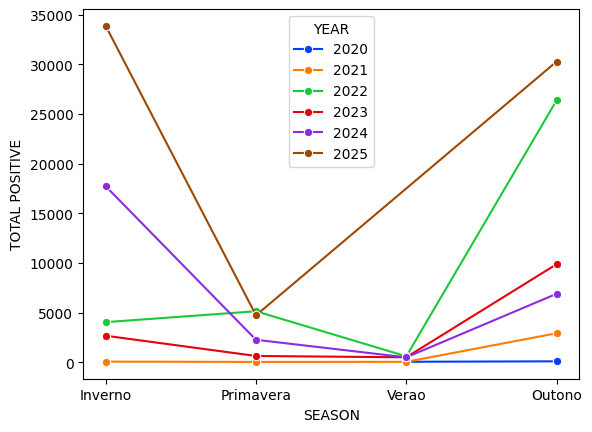

In [36]:
sns.lineplot(data=gripe, x='SEASON', y='TOTAL POSITIVE', hue='YEAR', marker='o', palette='bright', errorbar=None)

<Axes: xlabel='SEASON', ylabel='PERCENT POSITIVE'>

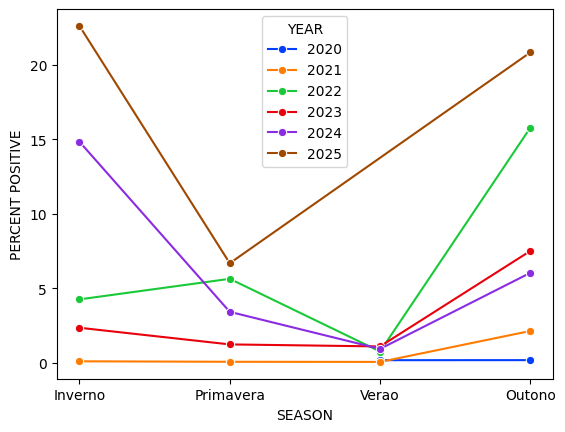

In [37]:
sns.lineplot(data=gripe, x='SEASON', y='PERCENT POSITIVE', hue='YEAR', marker='o', palette='bright', errorbar=None)

<Axes: xlabel='SEASON', ylabel='Count'>

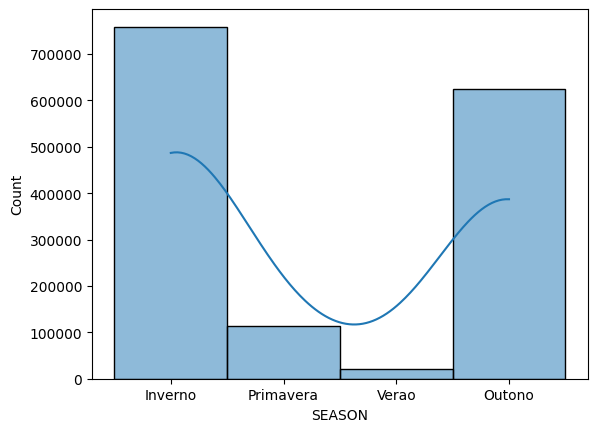

In [38]:
sns.histplot(data=gripe, x='SEASON', weights='TOTAL POSITIVE', kde=True)

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

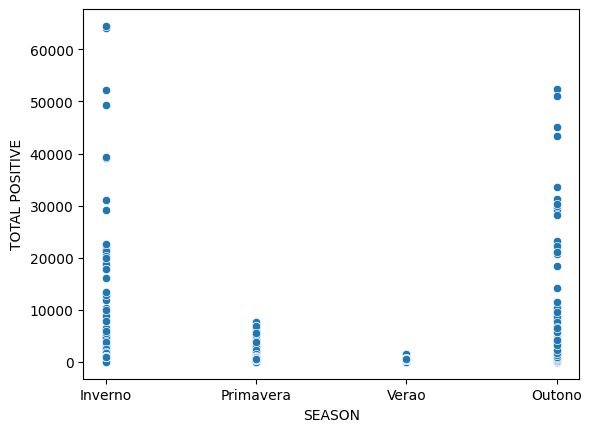

In [39]:
sns.scatterplot(data=gripe, x='SEASON', y='TOTAL POSITIVE')

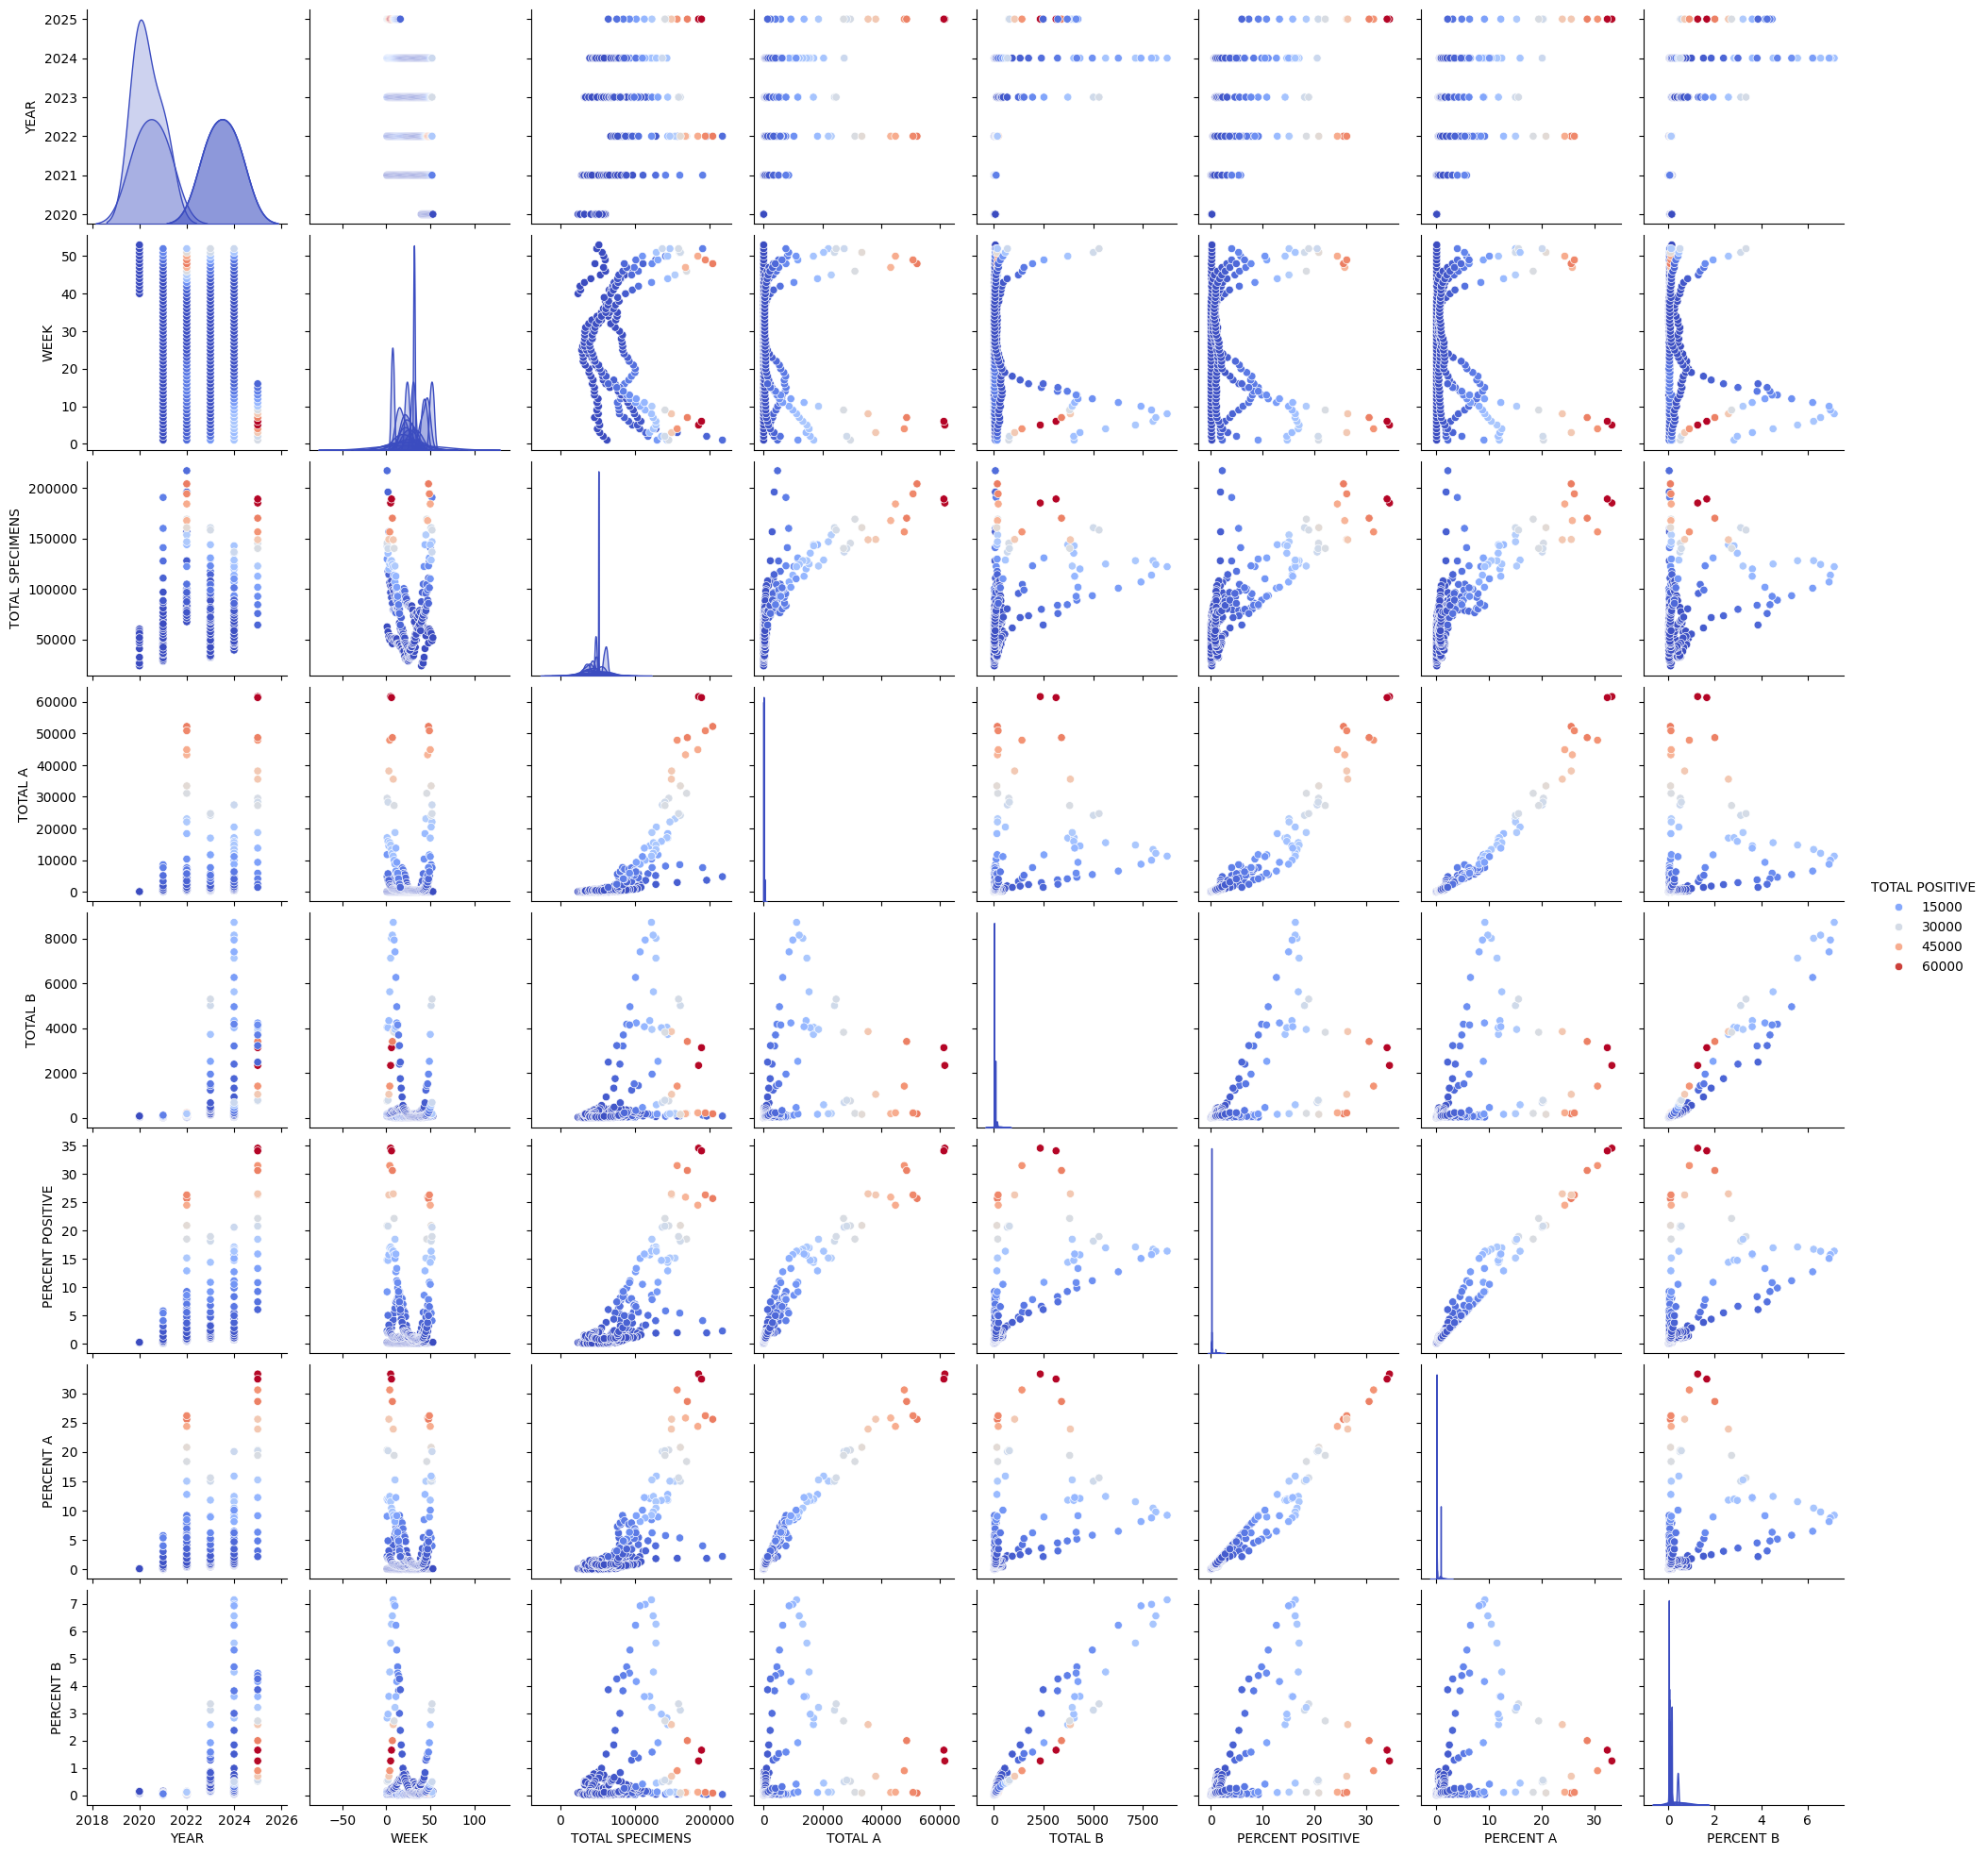

In [40]:
sns.pairplot(gripe, diag_kind='kde', hue='TOTAL POSITIVE', palette='coolwarm')

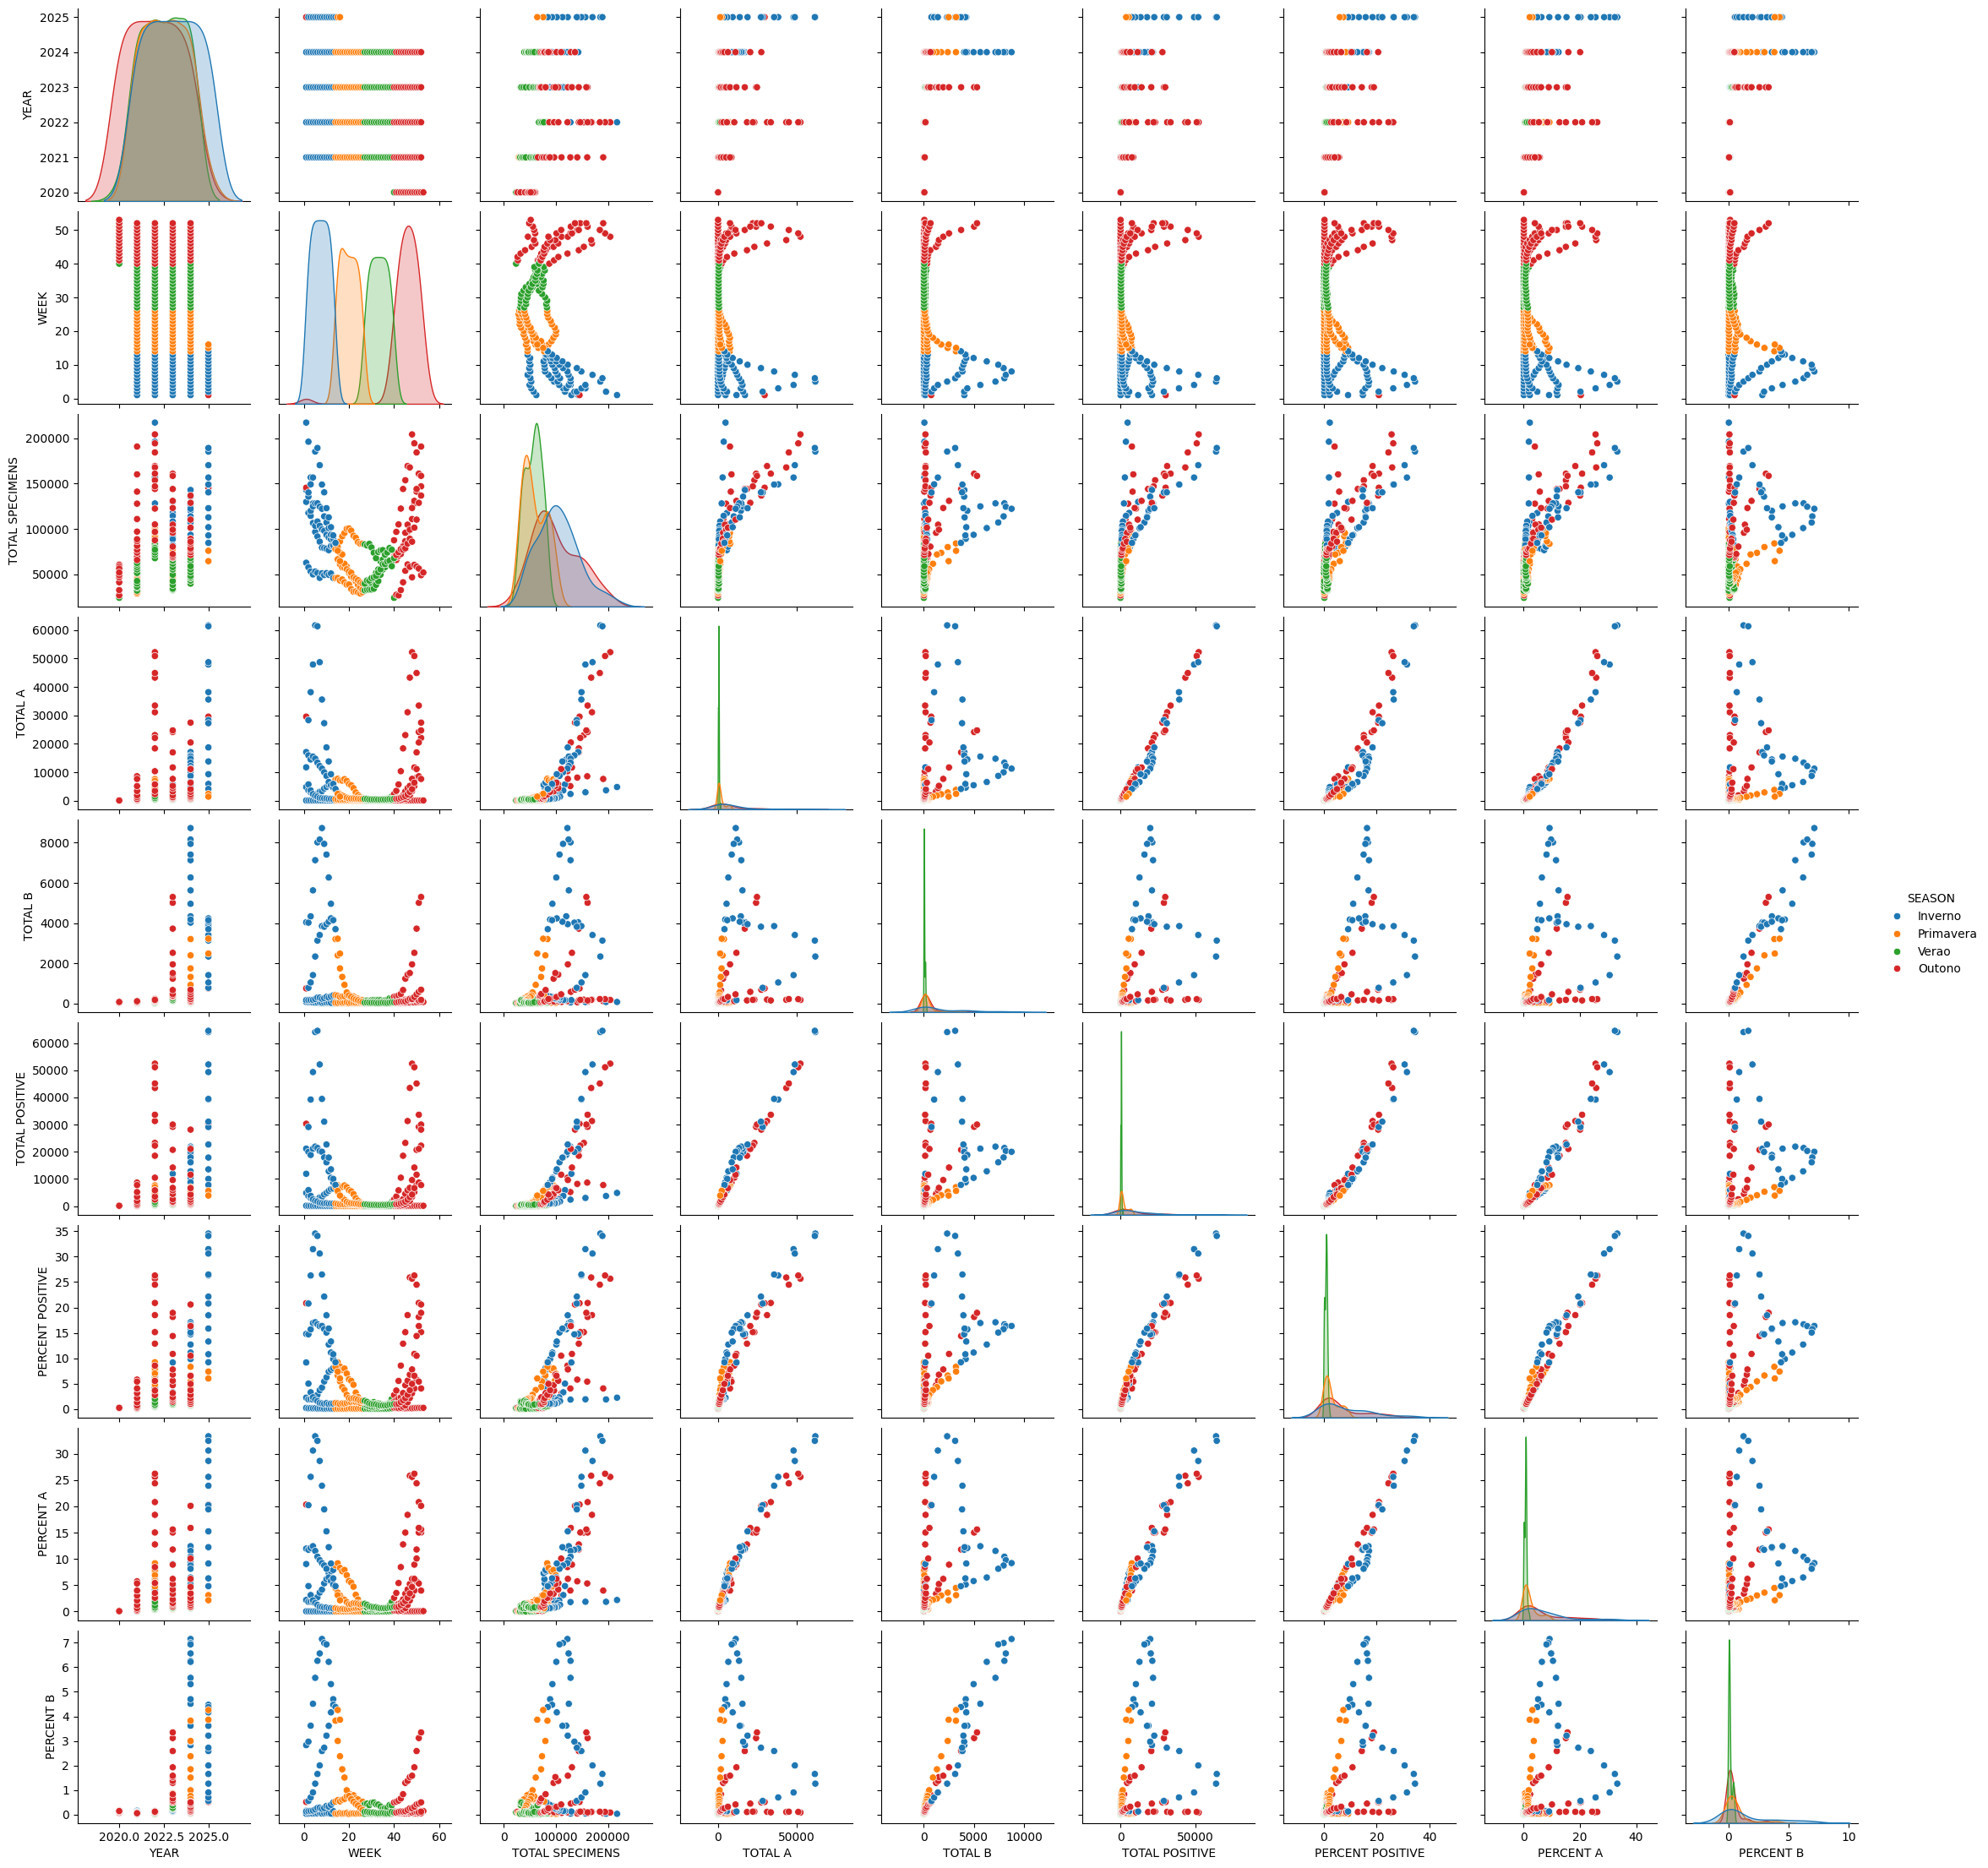

In [41]:
sns.pairplot(gripe, diag_kind='kde', hue='SEASON', palette='tab10')

<Axes: xlabel='SEASON', ylabel='TOTAL POSITIVE'>

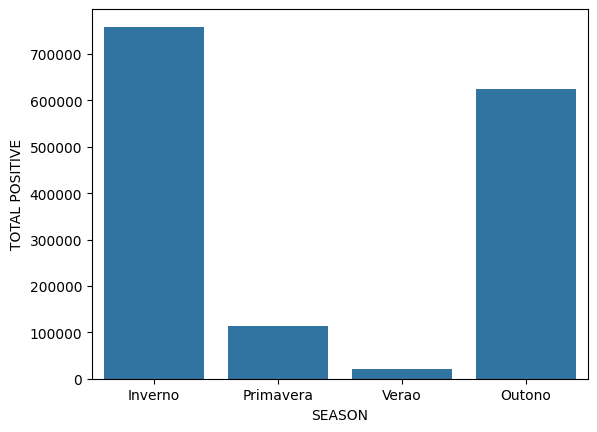

In [42]:
sns.barplot(data=gripe, x='SEASON', y='TOTAL POSITIVE', estimator=sum, errorbar=None)

# Normalização

In [43]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   DATE              238 non-null    datetime64[ns]
 10  SEASON            238 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(6)
memory usage: 19.2 KB


In [44]:
gripe.head()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,TOTAL POSITIVE,PERCENT POSITIVE,PERCENT A,PERCENT B,DATE,SEASON
0,2020,40,23825,22,23,45,0.188877,0.092340,0.096537,2020-09-28,Verao
1,2020,41,27162,38,34,72,0.265076,0.139901,0.125175,2020-10-05,Outono
2,2020,42,26512,32,31,63,0.237628,0.120700,0.116928,2020-10-12,Outono
3,2020,43,32355,34,25,59,0.182352,0.105084,0.077268,2020-10-19,Outono
4,2020,44,40976,30,35,65,0.158629,0.073214,0.085416,2020-10-26,Outono


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
if gripe['DATE'].dtype == 'datetime64[ns]':
    gripe['DATE_ORD'] = gripe['DATE'].map(pd.Timestamp.toordinal)
else:
    gripe['DATE_ORD'] = gripe['DATE']

In [48]:
cols_para_normalizar = ['DATE_ORD', 'TOTAL SPECIMENS', 'TOTAL A', 'TOTAL B']

In [49]:
scaler = StandardScaler()
gripe_normalizado = gripe.copy()
gripe_normalizado[cols_para_normalizar] = scaler.fit_transform(gripe[cols_para_normalizar])

In [50]:
gripe_normalizado[cols_para_normalizar + ['DATE']].head()

,DATE_ORD,TOTAL SPECIMENS,TOTAL A,TOTAL B,DATE
0,-1.724789,-1.452028,-0.501294,-0.447083,2020-09-28
1,-1.710233,-1.369105,-0.499858,-0.440518,2020-10-05
2,-1.695678,-1.385257,-0.500397,-0.442309,2020-10-12
3,-1.681123,-1.240061,-0.500217,-0.445890,2020-10-19
4,-1.666568,-1.025832,-0.500576,-0.439921,2020-10-26


# Utilizando o ML

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [54]:
X = gripe_normalizado[['DATE_ORD']] # essa é uma variavel independente

In [55]:
y_specimens = gripe_normalizado['TOTAL SPECIMENS'] #essas tres são dependentes
y_a = gripe_normalizado['TOTAL A']
y_b = gripe_normalizado['TOTAL B']

In [56]:
modelo = LinearRegression()

## Treinar os modelos

In [57]:
modelo.fit(X, y_specimens)
y_pred_specimens = modelo.predict(X)

In [58]:
modelo.fit(X, y_a)
y_pred_a = modelo.predict(X)

In [59]:
modelo.fit(X, y_b)
y_pred_b = modelo.predict(X)

In [60]:
print("TOTAL SPECIMENS")
print("MAE:", mean_absolute_error(y_specimens, y_pred_specimens))
print("R²:", r2_score(y_specimens, y_pred_specimens))
print()

TOTAL SPECIMENS
MAE: 0.7333105978782927
R²: 0.08498776618044013



In [61]:
print("TOTAL A")
print("MAE:", mean_absolute_error(y_a, y_pred_a))
print("R²:", r2_score(y_a, y_pred_a))
print()

TOTAL A
MAE: 0.5673384662805946
R²: 0.11400560935833748



In [62]:
print("TOTAL B")
print("MAE:", mean_absolute_error(y_b, y_pred_b))
print("R²:", r2_score(y_b, y_pred_b))

TOTAL B
MAE: 0.5527144782348083
R²: 0.19467702419373767


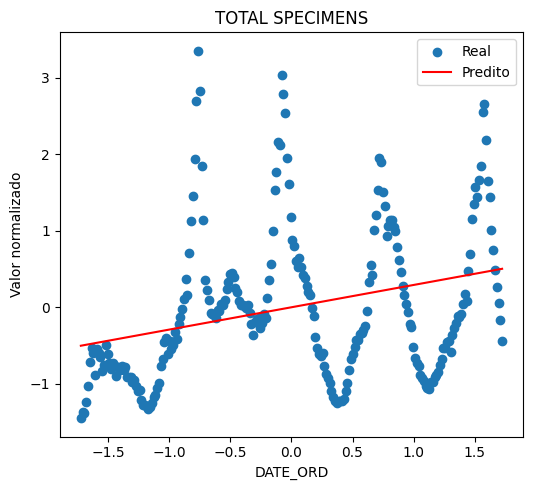

In [72]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter(X, y_specimens, label='Real')
plt.plot(X, y_pred_specimens, color='red', label='Predito')
plt.title('TOTAL SPECIMENS')
plt.xlabel('DATE_ORD')
plt.ylabel('Valor normalizado')
plt.legend()
plt.tight_layout()

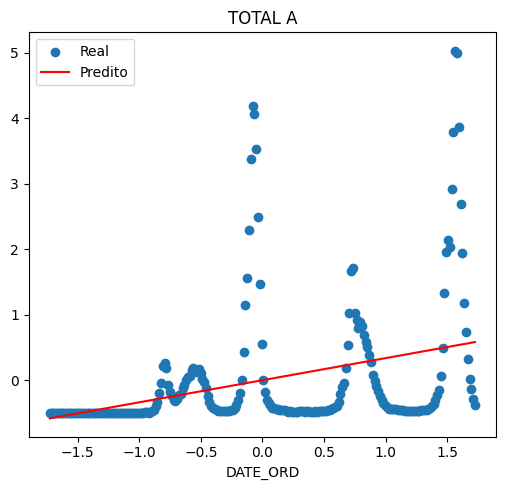

In [71]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(X, y_a, label='Real')
plt.plot(X, y_pred_a, color='red', label='Predito')
plt.title('TOTAL A')
plt.xlabel('DATE_ORD')
plt.legend()
plt.tight_layout()

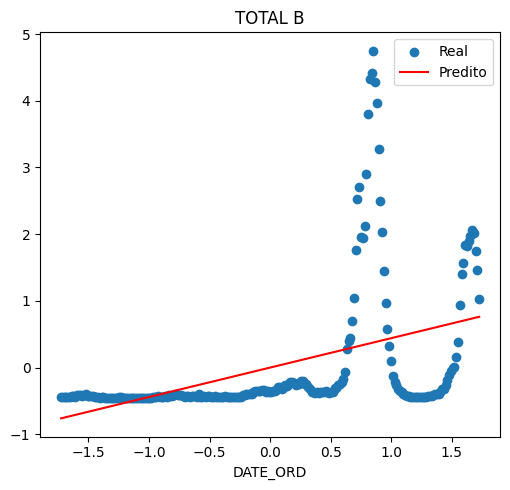

In [69]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.scatter(X, y_b, label='Real')
plt.plot(X, y_pred_b, color='red', label='Predito')
plt.title('TOTAL B')
plt.xlabel('DATE_ORD')
plt.legend()
plt.tight_layout()

In [73]:
pred_norm = np.column_stack((
    X['DATE_ORD'],       
    y_pred_specimens,    
    y_pred_a,            
    y_pred_b             
))

In [74]:
pred_desnorm = scaler.inverse_transform(pred_norm)

In [75]:
total_specimens_desnorm = pred_desnorm[:, 1]
total_a_desnorm = pred_desnorm[:, 2]
total_b_desnorm = pred_desnorm[:, 3]

In [76]:
print("TOTAL SPECIMENS desnormalizado:", total_specimens_desnorm[:5])
print("TOTAL A desnormalizado:", total_a_desnorm[:5])
print("TOTAL B desnormalizado:", total_b_desnorm[:5])

TOTAL SPECIMENS desnormalizado: [62023.02419043 62193.7802179  62364.53624537 62535.29227283
 62706.0483003 ]
TOTAL A desnormalizado: [-881.2218628  -826.4719141  -771.72196539 -716.97201669 -662.22206798]
TOTAL B desnormalizado: [-502.99845294 -492.23815681 -481.47786067 -470.71756454 -459.95726841]


In [77]:
print(gripe[['TOTAL A', 'TOTAL B']].describe())

            TOTAL A      TOTAL B
count    238.000000   238.000000
mean    5606.647059   772.096639
std    11163.937912  1679.050197
min        4.000000    10.000000
25%      251.000000    39.000000
50%      695.500000    91.500000
75%     5410.000000   352.500000
max    61677.000000  8731.000000


In [80]:
gripe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              238 non-null    int64         
 1   WEEK              238 non-null    int64         
 2   TOTAL SPECIMENS   238 non-null    int64         
 3   TOTAL A           238 non-null    int64         
 4   TOTAL B           238 non-null    int64         
 5   TOTAL POSITIVE    238 non-null    int64         
 6   PERCENT POSITIVE  238 non-null    float64       
 7   PERCENT A         238 non-null    float64       
 8   PERCENT B         238 non-null    float64       
 9   DATE              238 non-null    datetime64[ns]
 10  SEASON            238 non-null    category      
 11  DATE_ORD          238 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(7)
memory usage: 21.0 KB


In [82]:
# Criar variável semana (inteiro crescente)
gripe['WEEK_NUM'] = ((gripe['DATE'] - gripe['DATE'].min()).dt.days // 7).astype(int)

X = gripe[['WEEK_NUM']]
y_specimens = gripe['TOTAL SPECIMENS']
y_a = gripe['TOTAL A']
y_b = gripe['TOTAL B']

modelo = LinearRegression()

# TOTAL SPECIMENS
modelo.fit(X, y_specimens)
y_pred_specimens = modelo.predict(X)

# TOTAL A
modelo.fit(X, y_a)
y_pred_a = modelo.predict(X)
y_pred_a[y_pred_a < 0] = 0

# TOTAL B
modelo.fit(X, y_b)
y_pred_b = modelo.predict(X)
y_pred_b[y_pred_b < 0] = 0

from sklearn.metrics import mean_absolute_error, r2_score

print("TOTAL SPECIMENS - MAE:", mean_absolute_error(y_specimens, y_pred_specimens))
print("TOTAL SPECIMENS - R²:", r2_score(y_specimens, y_pred_specimens))

print("TOTAL A - MAE:", mean_absolute_error(y_a, y_pred_a))
print("TOTAL A - R²:", r2_score(y_a, y_pred_a))

print("TOTAL B - MAE:", mean_absolute_error(y_b, y_pred_b))
print("TOTAL B - R²:", r2_score(y_b, y_pred_b))


TOTAL SPECIMENS - MAE: 29509.93802554529
TOTAL SPECIMENS - R²: 0.08498776618044002
TOTAL A - MAE: 6288.752513786492
TOTAL A - R²: 0.11417755640764715
TOTAL B - MAE: 875.6254658734546
TOTAL B - R²: 0.20222563523109538


In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# 1. Criar variável semana
gripe['WEEK_NUM'] = ((gripe['DATE'] - gripe['DATE'].min()).dt.days // 7).astype(int)

# 2. Transformar 'SEASON' em variáveis dummy
season_dummies = pd.get_dummies(gripe['SEASON'], drop_first=True)

# 3. Montar dataframe com features
X_base = pd.concat([gripe[['WEEK_NUM']], season_dummies], axis=1)

# Função pra treinar e avaliar modelo polinomial grau 2
def treinar_e_avaliar(y, nome_variavel):
    model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
    model.fit(X_base, y)
    y_pred = model.predict(X_base)
    y_pred[y_pred < 0] = 0  # corrigir negativos
    
    print(f"\n{nome_variavel}:")
    print("MAE:", mean_absolute_error(y, y_pred))
    print("R²:", r2_score(y, y_pred))
    
    return y_pred

# Previsões e avaliação
y_specimens = gripe['TOTAL SPECIMENS']
y_a = gripe['TOTAL A']
y_b = gripe['TOTAL B']

pred_specimens = treinar_e_avaliar(y_specimens, "TOTAL SPECIMENS")
pred_a = treinar_e_avaliar(y_a, "TOTAL A")
pred_b = treinar_e_avaliar(y_b, "TOTAL B")



TOTAL SPECIMENS:
MAE: 20215.39239505176
R²: 0.548639527927764

TOTAL A:
MAE: 4781.513126782753
R²: 0.3803454804600839

TOTAL B:
MAE: 605.1313151901205
R²: 0.5194528058027027


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Já temos gripe, WEEK_NUM e season_dummies
gripe['WEEK_NUM'] = ((gripe['DATE'] - gripe['DATE'].min()).dt.days // 7).astype(int)
season_dummies = pd.get_dummies(gripe['SEASON'], drop_first=True)
X_base = pd.concat([gripe[['WEEK_NUM']], season_dummies], axis=1)

# Função para treino, predição e avaliação
def treinar_e_avaliar_com_split(y, nome_variavel):
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
    
    model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Corrigir valores negativos
    y_pred_train[y_pred_train < 0] = 0
    y_pred_test[y_pred_test < 0] = 0
    
    print(f"\n{nome_variavel}:")
    print("Treino - MAE:", mean_absolute_error(y_train, y_pred_train))
    print("Treino - R²:", r2_score(y_train, y_pred_train))
    print("Teste  - MAE:", mean_absolute_error(y_test, y_pred_test))
    print("Teste  - R²:", r2_score(y_test, y_pred_test))
    
    return model, (X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

# Rodar para cada variável
y_specimens = gripe['TOTAL SPECIMENS']
y_a = gripe['TOTAL A']
y_b = gripe['TOTAL B']

modelo_specimens, dados_specimens = treinar_e_avaliar_com_split(y_specimens, "TOTAL SPECIMENS")
modelo_a, dados_a = treinar_e_avaliar_com_split(y_a, "TOTAL A")
modelo_b, dados_b = treinar_e_avaliar_com_split(y_b, "TOTAL B")



TOTAL SPECIMENS:
Treino - MAE: 19421.841107465356
Treino - R²: 0.5527499215982644
Teste  - MAE: 23292.45259148869
Teste  - R²: 0.47373413437555645

TOTAL A:
Treino - MAE: 3990.0562052731266
Treino - R²: 0.5003749471723503
Teste  - MAE: 7297.018507464505
Teste  - R²: 0.0015018816624063902

TOTAL B:
Treino - MAE: 611.0370790447239
Treino - R²: 0.5158637372588388
Teste  - MAE: 588.3461186503856
Teste  - R²: 0.5521644182305033


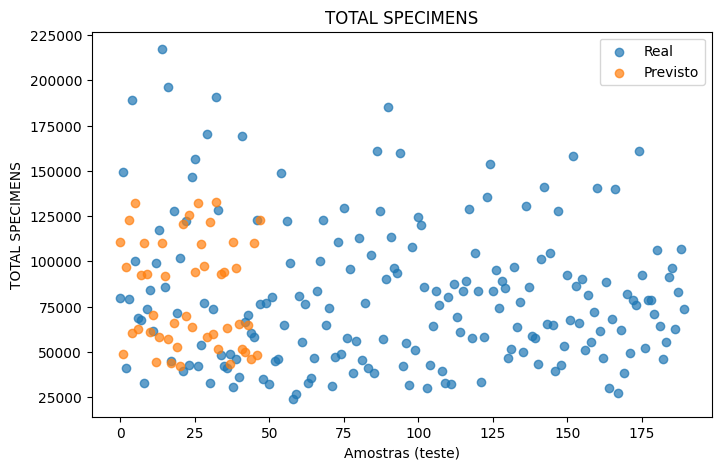

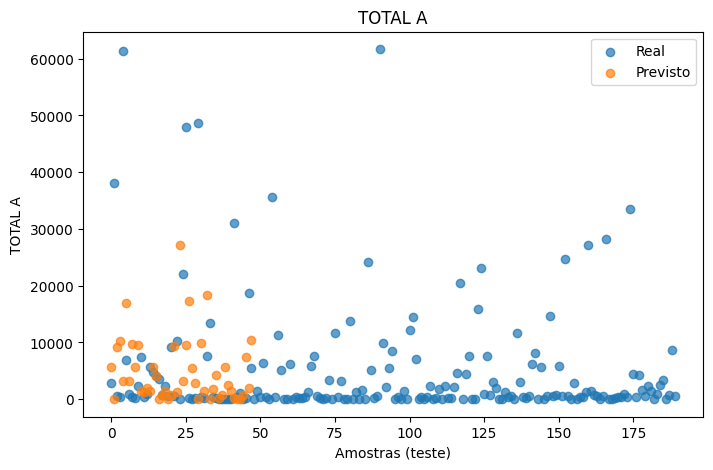

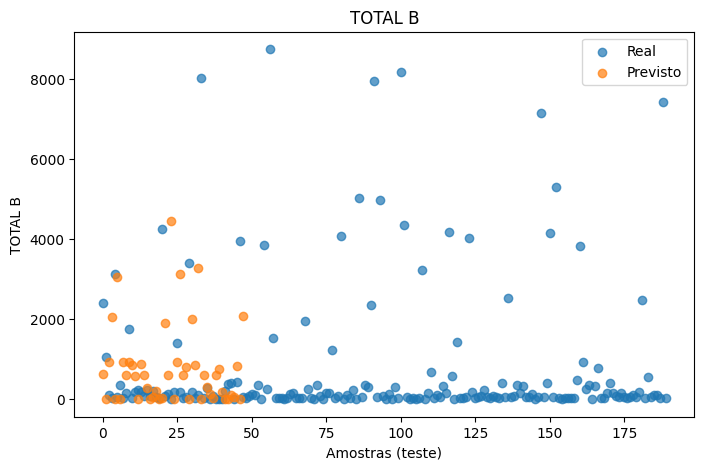

In [85]:
import matplotlib.pyplot as plt

def plot_real_vs_pred(y_test, y_pred, titulo):
    plt.figure(figsize=(8,5))
    plt.scatter(range(len(y_test)), y_test, label='Real', alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label='Previsto', alpha=0.7)
    plt.title(titulo)
    plt.xlabel('Amostras (teste)')
    plt.ylabel(titulo)
    plt.legend()
    plt.show()

# EXTRAIR y_test e y_pred dos dados que você já tem
_, X_test_specimens, y_test_specimens, _, _, y_pred_test_specimens = dados_specimens
_, X_test_a, y_test_a, _, _, y_pred_test_a = dados_a
_, X_test_b, y_test_b, _, _, y_pred_test_b = dados_b

plot_real_vs_pred(y_test_specimens, y_pred_test_specimens, 'TOTAL SPECIMENS')
plot_real_vs_pred(y_test_a, y_pred_test_a, 'TOTAL A')
plot_real_vs_pred(y_test_b, y_pred_test_b, 'TOTAL B')


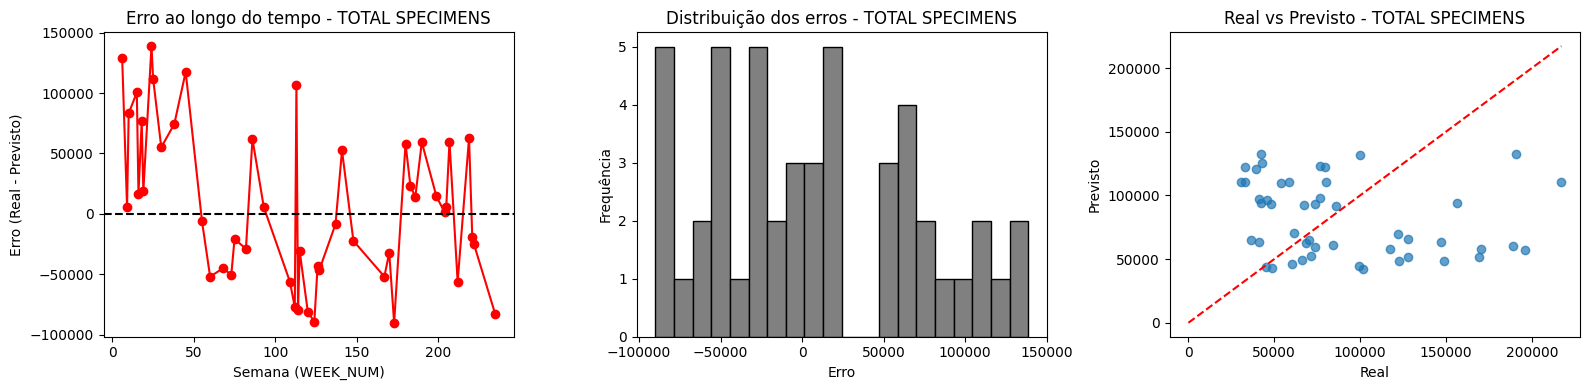

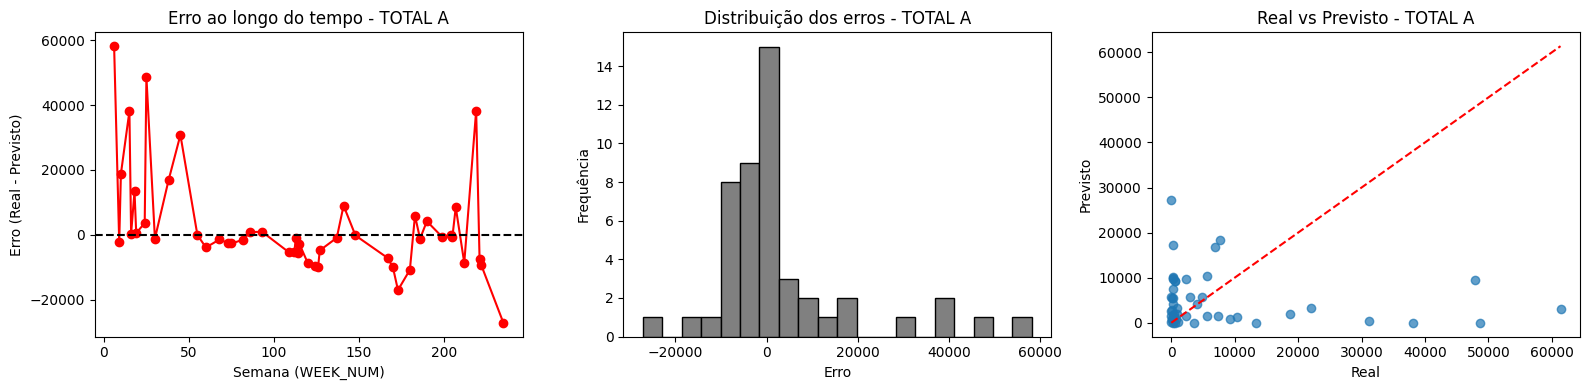

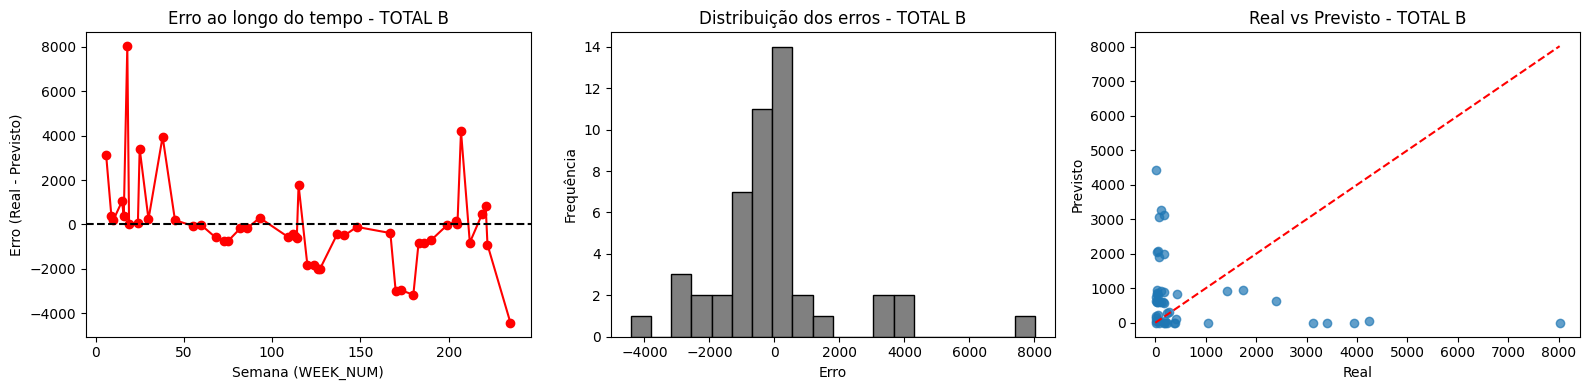

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def graficos_detalhados(X_test, y_test, y_pred, titulo):
    # Ordenar por WEEK_NUM para visualização temporal
    ordem = np.argsort(X_test['WEEK_NUM'])
    semanas_ordenadas = X_test['WEEK_NUM'].values[ordem]
    y_test_ordenado = y_test.values[ordem]
    y_pred_ordenado = y_pred[ordem]

    erro = y_test_ordenado - y_pred_ordenado

    plt.figure(figsize=(16, 4))

    # 1. Erro ao longo do tempo
    plt.subplot(1,3,1)
    plt.plot(semanas_ordenadas, erro, marker='o', linestyle='-', color='red')
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f'Erro ao longo do tempo - {titulo}')
    plt.xlabel('Semana (WEEK_NUM)')
    plt.ylabel('Erro (Real - Previsto)')

    # 2. Histograma dos erros
    plt.subplot(1,3,2)
    plt.hist(erro, bins=20, color='gray', edgecolor='black')
    plt.title(f'Distribuição dos erros - {titulo}')
    plt.xlabel('Erro')
    plt.ylabel('Frequência')

    # 3. Real vs Previsto com linha identidade
    plt.subplot(1,3,3)
    plt.scatter(y_test_ordenado, y_pred_ordenado, alpha=0.7)
    max_val = max(y_test_ordenado.max(), y_pred_ordenado.max())
    plt.plot([0, max_val], [0, max_val], 'r--')
    plt.title(f'Real vs Previsto - {titulo}')
    plt.xlabel('Real')
    plt.ylabel('Previsto')

    plt.tight_layout()
    plt.show()

# Rodar os gráficos para as 3 variáveis
graficos_detalhados(X_test_specimens, y_test_specimens, y_pred_test_specimens, 'TOTAL SPECIMENS')
graficos_detalhados(X_test_a, y_test_a, y_pred_test_a, 'TOTAL A')
graficos_detalhados(X_test_b, y_test_b, y_pred_test_b, 'TOTAL B')


1. Erro ao longo do tempo
O gráfico mostra a diferença entre o valor real e o previsto para cada semana (Real - Previsto).

Se a linha oscila em torno de zero, o modelo não está enviesado no tempo.

Grandes picos (positivos ou negativos) indicam semanas em que o modelo errou feio — vale investigar o que houve ali (dados fora da curva, eventos especiais, etc).

Tendências (ex: erro sistematicamente positivo ou negativo) indicam viés no modelo para certos períodos.

2. Histograma dos erros
Mostra a distribuição dos erros.

Se for aproximadamente uma distribuição normal centrada em zero, significa que o modelo não tem viés forte.

Erros muito concentrados perto de zero indicam previsões precisas.

Caudas longas indicam casos atípicos onde o modelo errou muito.

3. Gráfico Real vs Previsto
Plota o valor real contra o valor previsto para cada ponto.

A linha vermelha tracejada (y = x) representa o modelo perfeito — tudo que estiver sobre essa linha é previsão exata.

Pontos abaixo da linha indicam que o modelo subestimou o valor.

Pontos acima indicam superestimação.

Quanto mais perto da linha, melhor a previsão.

O que observar nos seus gráficos?
Se você ver muitos pontos longe da linha y = x ou erros sistemáticos ao longo do tempo, pode ser sinal de que o modelo pode ser melhorado.

Caso o histograma mostre muitos erros grandes, talvez valha usar transformações ou modelos mais robustos.

## Random Forest Regressor e XGBoost Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Já temos X_base (WEEK_NUM + season dummies) e y's

X_train, X_test, y_train_specimens, y_test_specimens = train_test_split(X_base, y_specimens, test_size=0.2, random_state=42)
_, _, y_train_a, y_test_a = train_test_split(X_base, y_a, test_size=0.2, random_state=42)
_, _, y_train_b, y_test_b = train_test_split(X_base, y_b, test_size=0.2, random_state=42)


In [90]:
def treinar_e_avaliar_modelo(modelo, X_train, y_train, X_test, y_test, nome_variavel):
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    # Corrigir previsões negativas
    y_pred_train = [max(0, p) for p in y_pred_train]
    y_pred_test = [max(0, p) for p in y_pred_test]
    
    print(f"\n{nome_variavel} - {modelo.__class__.__name__}:")
    print("Treino - MAE:", mean_absolute_error(y_train, y_pred_train))
    print("Treino - R²:", r2_score(y_train, y_pred_train))
    print("Teste  - MAE:", mean_absolute_error(y_test, y_pred_test))
    print("Teste  - R²:", r2_score(y_test, y_pred_test))
    
    return y_pred_test


In [91]:
rf_specimens = RandomForestRegressor(random_state=42, n_estimators=100)
rf_a = RandomForestRegressor(random_state=42, n_estimators=100)
rf_b = RandomForestRegressor(random_state=42, n_estimators=100)

pred_rf_specimens = treinar_e_avaliar_modelo(rf_specimens, X_train, y_train_specimens, X_test, y_test_specimens, "TOTAL SPECIMENS")
pred_rf_a = treinar_e_avaliar_modelo(rf_a, X_train, y_train_a, X_test, y_test_a, "TOTAL A")
pred_rf_b = treinar_e_avaliar_modelo(rf_b, X_train, y_train_b, X_test, y_test_b, "TOTAL B")



TOTAL SPECIMENS - RandomForestRegressor:
Treino - MAE: 1860.2198421052633
Treino - R²: 0.9946622721969872
Teste  - MAE: 6400.781458333334
Teste  - R²: 0.9415250157602629

TOTAL A - RandomForestRegressor:
Treino - MAE: 356.9221052631578
Treino - R²: 0.9914703256249751
Teste  - MAE: 2203.5358333333334
Teste  - R²: 0.836180545425164

TOTAL B - RandomForestRegressor:
Treino - MAE: 31.470210526315775
Treino - R²: 0.997884958856501
Teste  - MAE: 93.17166666666667
Teste  - R²: 0.9779930450659693


In [92]:
xgb_specimens = xgb.XGBRegressor(random_state=42, n_estimators=100, objective='reg:squarederror')
xgb_a = xgb.XGBRegressor(random_state=42, n_estimators=100, objective='reg:squarederror')
xgb_b = xgb.XGBRegressor(random_state=42, n_estimators=100, objective='reg:squarederror')

pred_xgb_specimens = treinar_e_avaliar_modelo(xgb_specimens, X_train, y_train_specimens, X_test, y_test_specimens, "TOTAL SPECIMENS")
pred_xgb_a = treinar_e_avaliar_modelo(xgb_a, X_train, y_train_a, X_test, y_test_a, "TOTAL A")
pred_xgb_b = treinar_e_avaliar_modelo(xgb_b, X_train, y_train_b, X_test, y_test_b, "TOTAL B")



TOTAL SPECIMENS - XGBRegressor:
Treino - MAE: 119.04979440789474
Treino - R²: 0.9999813078591615
Teste  - MAE: 7968.393310546875
Teste  - R²: 0.9306240353461049

TOTAL A - XGBRegressor:
Treino - MAE: 5.096898656142385
Treino - R²: 0.9999995209576428
Teste  - MAE: 2446.504587610563
Teste  - R²: 0.8439186689815203

TOTAL B - XGBRegressor:
Treino - MAE: 0.9768472822088944
Treino - R²: 0.9999994392405424
Teste  - MAE: 163.68544673919678
Teste  - R²: 0.9293591861523388
